# Oplossing fit-vraag dataset 4:
## a) Figuur met data én fit:
![image of fit](Figure_1.png "Datapoints and Fit")
## b) Ge-optimaliseerde parameters met correcte beduidende cijfers:
- Parameter $x_0$       :     $    0.3_{-   0.4}^{+   0.5} $
- Parameter $\gamma$    :     $    2.0_{-   0.4}^{+   0.6} $
- Parameter $A$        :     $  7*10^2 \pm  1*10^2 $
- Parameter $y_0$       :     $  101 \pm    3 $
## c) Figuur van $\chi^2$-waarden rond minimum per parameter:
![image of X^2 around minima](Figure_2.png "Image of X^2 around minima")
## d) Code
*zie hieronder*
## e) $\chi^2_{red}$ en bespreking
- We weten van $\chi^2_{red}$ dat (excerpt uit mijn code (die is in het engels)):
    - χ²_red < 1: Indicates that the model fits the data better than expected;
        may suggest overfitting or underestimated uncertainties.
    - χ²_red ≈ 1: Indicates a good fit; the model represents the data well.
    - χ²_red > 1: Indicates that the model fits the data worse than expected;
        may suggest significant deviations or missing factors.
- Omdat $\chi^2_{red} = 0.964$ ≈ 1: **Kunnen we zeggen dat dit een goede fit is.**
## f) P-waarde en bespreking
- We weten van de p-waarde met een betrouwbaarheidsniveau α dat (excerpt uit mijn code (die is in het engels)):
    - P-value < α: Weak or no evidence in favour of the null hypothesis;
             results are not statistically significant.
    - P-value <≈ α: Weak evidence against the null hypothesis;
             results may indicate a trend but are not statistically significant.
    - P-value >≈ α: Moderate evidence in favour of the null hypothesis;
             results are statistically significant but with less confidence.
    - P-value > α: Strong evidence in favour of the null hypothesis;
             results are statistically significant.
- Omdat de p-waarde = 0.55904287 > α = 5%; **Dus deze fit is statistisch significant.**
--------------------------------------------

# Code fitalgoritme
## Voorwoord
Beste lezer, de onderstaande code is **niet bedoeld voor een .ipynb file**, dit is één functie bedoeld voor een losstaand .py file. Hierdoor zal de code een pak moeilijker te begrijpen zijn als je een .ipynb structuur verwacht. Ik raad aan op te beginnen met de code lezen vanaf **na** de `X_sq()` definitie, hier staat uitgelegd hoe je de functie moet customisen en aanpassen om een willekeurige functie te fitten met een arbitreir aantal parameters op een dataset. Door dit laatste is de code ook erg complex, omdat ik gegaan ben voor een zo flexibel mogelijk programma. Dit houdt wel in dat dit programma bruikbaar zou moeten zijn om eender welke fitopdracht te handelen.
## Documentatie
Het programma is zeer goed gedocumenteerd. Elke functie bevat een commentblock om aan te geven:
    1) Wat de functie doet.
    2) Welke parameters hij verwacht.
    3) Wat de functie teruggeeft.
Onder de `X_sq()` functie staan ook een paar commentblocks die uitleg geven over hoe de functie aangepast moet worden om andere datasets en functies te fitten, ookals welke flags (kwargs) meegegeven kunnen worden.
## De functie zelf
De functie zelf zou als *(Als de volledige output gevraagd wordt: met alle optionele flags enabled)* alle nodige informatie moeten printen *(in terminal (.py) of onderaan de cell (.ipynb))*.


---------START--------------------------------------------------------------------------------------------------
Datasets_fitopdracht/4.txt
----------------------------------------------------------------------------------------------------------------


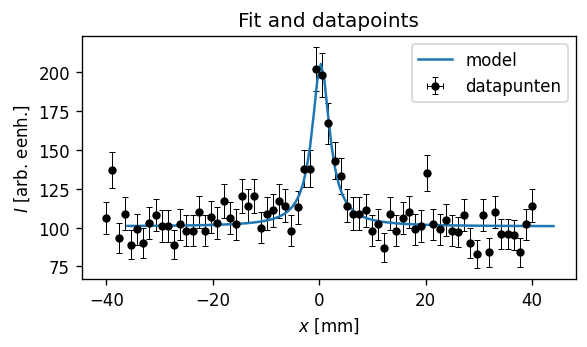

For parameter x0       :     Minimum at       0.30761947     ;     68% CI = [     -0.13263030,       0.77157873]
For parameter gamma    :     Minimum at       1.99186451     ;     68% CI = [      1.57942799,       2.59245889]
For parameter A        :     Minimum at     654.54148587     ;     68% CI = [    545.50905344,     763.57420294]
For parameter y0       :     Minimum at     100.70614108     ;     68% CI = [     98.03452440,     103.37775800]
----------------------------------------------------------------------------------------------------------------
Minimal χ² value       :     χ²_min          63.65265429
Reduced χ² value       :     χ²_red           0.96443416
P-value                :     p-value          0.55904287


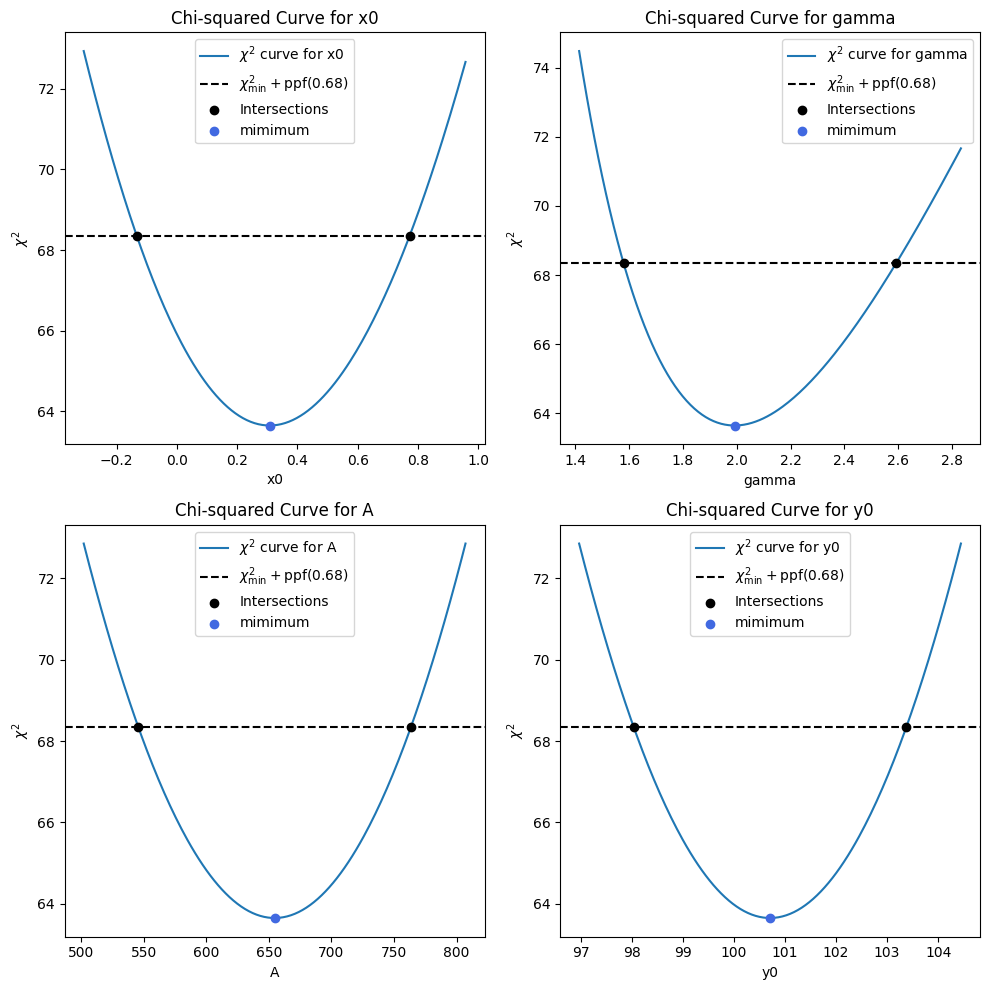

----------------------------------------------------------------------------------------------------------------
For parameter x0       :     $    0.308_{-   0.440}^{+   0.464} $
For parameter gamma    :     $    1.992_{-   0.412}^{+   0.601} $
For parameter A        :     $  654.541 \pm  109.033 $
For parameter y0       :     $  100.706 \pm    2.672 $
----------------------------------------------------------------------------------------------------------------
Interpretation of Minimal Chi-Squared (χ²_minimal):
	1. χ²_minimal is low:
	   - Suggests a good fit of the model to the data;
	     observed values closely match expected values.
	2. χ²_minimal is moderate:
	   - Indicates a reasonable fit;
	     some discrepancies between observed and expected values.
	3. χ²_minimal is high:
	   - Suggests a poor fit of the model to the data;
	     observed values significantly deviate from expected values.

Interpretation of Reduced Chi-Squared (χ²_red):
	1. χ²_red < 1:
	   - Indicates that

In [10]:
import numpy as np
from scipy.optimize import minimize, root_scalar
import matplotlib.pyplot as plt
from scipy.stats import chi2 as chi_2_sci

# WARNING: DO NOT EDIT THIS FUNCTION (if not needed), LOOK BELOW FOR USAGE INSTRUCTIONS AND CUSTOMISATION
def X_sq(data, param_names, initial_guess, model,
        root_attempts=None, PLOT=True, datafile=None, VERBOSE=False, LaTeX=False,
        graf1_title=None, graf1_y_label=None, graf1_x_label=None
        ):
    """
    INFO: made by @MathiMuts
    visit: [https://github.com/MathiMuts/Experimentele/tree/main/Practicum3] for the repo on github
    ----------
    
    INFO: Main function to process data, optimize model parameters, and generate
    Chi-squared plots along with 68% confidence intervals and other statistics.

    INFO: Parameters:
    ----------
    data : tuple ((x, dx), (y, dy)) or (x, y)
        A tuple containing two NumPy arrays, representing values and associated errors.
    param_names : list
        A list of parameter names to be optimized.
    initial_guess : list or None
        Initial guess values for the parameters.
    model : function
        The model function to fit the data.
    root_attempts : int, optional
        Number of attempts to find the roots (default: None).
    PLOT : bool, optional
        If True, generate plots (default: True).
    datafile : str, optional
        Name of the data file (default: None).
    VERBOSE : bool, optional
        If True, generate interpretation for some statistics (default: False).
    LaTeX : bool, optional
        If True, generate the LaTeX string for the parameters (default: False).
    graf1_title : str, optional
        Title of the first graph (default: None).
    graf1_y_label : str, optional
        Y-axis label for the first graph (default: None).
    graf1_x_label : str, optional
        X-axis label for the first graph (default: None).

    INFO: Returns:
    -------
    None
    """


    def readable_error(message):
        """
        INFO: Raises a ValueError with a formatted error message. This improves readability of errors.

        INFO: Parameters:
        ----------
        message : str
            The error message to be displayed.
        """
        raise Exception(f"\n\n-----------\nERROR: {message}\n-----------")
    
    
    def process_data(data):
        """
        INFO: Processes input data to separate values and their associated errors.

        The input `data` is expected to be a tuple that contains two elements. Each element can either be:
        - A tuple containing two NumPy arrays: the first array represents the values, and the second array represents their associated errors.
        - A single NumPy array: in this case, the array represents the values, and the associated errors are assumed to be 1% of the associated value for all entries.

        The function extracts and assigns the appropriate arrays to the variables `x`, `dx`, `y`, and `dy`:
        - `x`: The first set of values.
        - `dx`: The errors associated with `x`. If no errors are provided, it defaults to an array of 1% of x of the same length as `x`.
        - `y`: The second set of values.
        - `dy`: The errors associated with `y`. If no errors are provided, it defaults to an array of 1% of y of the same length as `y`.

        INFO: Parameters:
        ----------
        data : tuple ((x, dx), (y, dy)) or (x, y)
            A tuple containing either:
            - Two NumPy arrays representing values and associated errors, respectively (for both `x` and `y`).
            - A single NumPy array representing values without any associated errors.

        INFO: Returns:
        -------
        tuple
            A tuple `(x, y, dx, dy)` where:
            - `x`: NumPy array representing the first set of values.
            - `dx`: NumPy array representing the errors for `x` (or 1% value if not provided).
            - `y`: NumPy array representing the second set of values.
            - `dy`: NumPy array representing the errors for `y` (or 1% value if not provided).
        """
        x, dx, y ,dy = None, None, None, None

        if not isinstance(data, tuple) or len(data) != 2:
            raise readable_error("Input data must be a tuple of two elements (for x and y).")

        for i, element in enumerate(data):
            if isinstance(element, tuple):
                if len(element) != 2 or not all(isinstance(arr, np.ndarray) for arr in element):
                    raise readable_error(f"Element {i} in data must be a tuple of one or two NumPy arrays.")
                if i == 0:
                    x, dx = element
                    dx = np.abs(dx)
                elif i == 1:
                    y, dy = element
                    dy = np.abs(dy)
            elif isinstance(element, np.ndarray):
                if i == 0:
                    x = element
                    dx = np.abs(x*0.01)
                elif i == 1:
                    y = element
                    dy = np.abs(y*0.01)
                    warnings.append('! No y-error was given, 1% were assumed, but this will lead to a suboptimal fit!')
            else:
                raise readable_error(f"Element {i} must be either a tuple of two NumPy arrays or a single NumPy array.")
            

        if x is None or y is None:
            raise readable_error("x and y values must be provided as NumPy arrays.")
        if len(x) != len(dx):
            raise readable_error("Length of x and dx must be the same.")
        if len(y) != len(dy):
            raise readable_error("Length of y and dy must be the same.")
        if len(x) != len(y):
            raise readable_error("Length of x and y must be the same.")
        
        return x, y, dx, dy
    

    def init(initial_guess, param_names):
        """
        INFO: Initializes the parameter guess based on user input or defaults.

        INFO: Parameters:
        ----------
        initial_guess : list or None
            The initial guesses for parameters.
        param_names : list
            The names of the parameters to be optimized.

        INFO: Returns:
        -------
        np.ndarray
            The initialized parameter guess as a NumPy array.
        """
        if not initial_guess or len(initial_guess) != len(param_names):
            initial_guess = np.ones(len(param_names))
            print("WARN: No or invalid initial guess, all 1s were taken.\n-----------------------")
        else:
            initial_guess = np.array(initial_guess)
        return initial_guess


    def chi2(params, x, y, dy):
        """
        INFO: Calculates the chi-squared value for the given parameters, data, and model.

        INFO: Parameters:
        ----------
        params : np.ndarray
            Array of model parameters.
        x : np.ndarray
            The independent variable data.
        y : np.ndarray
            The dependent variable data.
        dy : np.ndarray
            Errors associated with the dependent variable.

        INFO: Returns:
        -------
        float
            The chi-squared value.
        """
        try:
            chi2_calc = np.sum((y - model(params, x))**2/(dy**2))
        except ValueError:
            raise readable_error("The amount of items in `param_names` does not match the amount of parameters expected from the `model()` function.")
        return chi2_calc


    def plot_fit(x_val, y_val, dx, dy, title, y_label, x_label):
        """
        INFO: Plots the data along with the model fit.

        INFO: Parameters:
        ----------
        x_val : np.ndarray
            The x data values.
        y_val : np.ndarray
            The y data values.
        dx : np.ndarray
            The errors in x values.
        dy : np.ndarray
            The errors in y values.
        title : str
            Title of the plot.
        y_label : str
            Label for the y-axis.
        x_label : str
            Label for the x-axis.

        INFO: Returns:
        -------
        None
        """
        model_x = np.linspace(0.9*np.min(x_val), 1.1*np.max(x_val), 120)
        model_y = np.array([])
        for x in model_x:
            model_y = np.array(list(model_y) + [model(vaste_waarden, x)])
        fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(5, 3))

        ax.errorbar(x_val, y_val, xerr=dx, yerr=dy, label="datapunten",
                marker="o", markersize=4, fmt=" ", color="black", ecolor="black", capsize=2, capthick=0.6, linewidth=0.6)
        plt.plot(model_x, model_y, label='model')

        if y_label:
            ax.set_ylabel(y_label)
        if x_label:
            ax.set_xlabel(x_label)
        if title:
            ax.set_title(title)
        ax.legend()  
        plt.tight_layout() ; plt.show()


    def optimise(optimise_output):
        """
        INFO: Processes the output from the optimization function.

        INFO: Parameters:
        ----------
        optimise_output : scipy.optimize.OptimizeResult
            The result from the optimization function.

        INFO: Returns:
        -------
        tuple
            A tuple containing the optimization result, the minimum chi-squared value,
            and the optimized parameters.
        """
        return optimise_output, optimise_output.fun, optimise_output.x

    
    def init_fig():
        """
        INFO: Initializes a figure for subplots to display chi-squared curves.

        INFO: Returns:
        -------
        tuple
            A tuple containing the figure, axes, number of parameters, number of rows, and number of columns.
        """
        num_params = len(param_names)
        num_cols = 2
        num_rows = (num_params + num_cols - 1) // num_cols
        fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 5 * num_rows))
        axs = axs.flatten()
        return fig, axs, num_params, num_rows, num_cols
    

    def finish_fig(num_params_f, num_rows_f, num_cols_f):
        """
        INFO: Finalizes the figure by removing unused axes.

        INFO: Parameters:
        ----------
        num_params_f : int
            The number of parameters.
        num_rows_f : int
            The number of rows in the figure.
        num_cols_f : int
            The number of columns in the figure.

        INFO: Returns:
        -------
        tuple
            The updated figure and axes.
        """
        for i in range(num_params_f, num_rows_f * num_cols_f):
            fig.delaxes(axs[i])
        plt.tight_layout()
        plt.show()
        return fig, axs


    def single_var_model(var, i, params, x):
        """
        INFO: Adjusts only the i-th parameter and returns the model output.

        INFO: Parameters:
        ----------
        var : float
            The value to adjust for the i-th parameter.
        i : int
            The index of the parameter to adjust.
        params : np.ndarray
            The current parameters.
        x : np.ndarray
            The x data.

        INFO: Returns:
        -------
        np.ndarray
            The model output with the adjusted parameter.
        """
        params[i] = var
        return model(params, x)


    def chi2_adjusted(var, i, params, x):
        """
        INFO: Computes the chi-squared value by varying one parameter.

        INFO: Parameters:
        ----------
        var : float
            The value to adjust for the i-th parameter.
        i : int
            The index of the parameter to adjust.
        params : np.ndarray
            The current parameters.
        x : np.ndarray
            The x data.

        INFO: Returns:
        -------
        float
            The adjusted chi-squared value.
        """
        chi2_val = np.sum((y - single_var_model(var, i, params.copy(), x)) ** 2 / (dy ** 2))
        return chi2_val


    def calc_chi2_values(value, x, param_names):
        """
        INFO: Calculate the chi-squared-minimum and chi-squared-reduced.

        INFO: Parameters:
        ----------
        value : float
            The chi-squared statistic to be adjusted.
        x : array-like
            The data points for which the chi-squared is being calculated.
        param_names : list
            The names of the parameters used in the model.

        INFO: Returns:
        -------
        tuple
            A tuple containing the original chi-squared value, the adjusted value per degree of freedom and the p-value.
        """
        if len(x)-len(param_names) == 0:
            warnings.append('! Divide by zero while trying to devide by `count(datapoints) - count(parameters)`.\n\tTry excluding one datapoint, this should resolve this error.\n\tThe program has automatically excluded the last point.')
            x = x[:-1]

        chi_red = value/(len(x)-len(param_names))
        p_value = chi_2_sci.sf(value, (len(x)-len(param_names)))
        return value, chi_red, p_value


    def objective(var):
        """
        INFO: Defines the function to minimize (difference between chi-squared and target).

        INFO: Parameters:
        ----------
        var : float
            The value of the parameter to adjust.

        INFO: Returns:
        -------
        float
            The difference between the chi-squared value and the target line.
        """
        params_copy = vaste_waarden.copy()
        chi2_val = chi2_adjusted(var, index, params_copy, x)
        return chi2_val - lijn_y


    def add_subplot(axs, vaste_waarden, index, param, sigma_L, sigma_R, lijn_y, x):
        """
        INFO: Adds a subplot to the figure showing the chi-squared curve for a parameter.

        INFO: Parameters:
        ----------
        axs : np.ndarray
            The axes of the figure.
        vaste_waarden : np.ndarray
            The optimized parameter values.
        index : int
            The index of the parameter.
        param : str
            The name of the parameter.
        sigma_L : float
            The left bound of the confidence interval.
        sigma_R : float
            The right bound of the confidence interval.
        lijn_y : float
            The target chi-squared value.
        x : np.ndarray
            The x data.

        INFO: Returns:
        -------
        np.ndarray
            The updated axes with the new subplot.
        """
        chi_x = np.linspace(
            vaste_waarden[index] - 1.4*np.abs(vaste_waarden[index] - sigma_L),
            vaste_waarden[index] + 1.4*np.abs(vaste_waarden[index] - sigma_R),
            200)
        chi_y = np.array([chi2_adjusted(p, index, vaste_waarden.copy(), x) for p in chi_x])

        axs[index].plot(chi_x, chi_y, label=r"$\chi^2$" + f" curve for {param}")
        axs[index].axhline(y=lijn_y, color='black', linestyle='--', label=r"$\chi^2_{\text{min}} + \text{ppf}(0.68)$")
        axs[index].scatter([sigma_L, sigma_R], [lijn_y, lijn_y], color='black', zorder=5, label='Intersections')
        axs[index].scatter([vaste_waarden[index]], [chi2_adjusted(vaste_waarden[index], index, vaste_waarden.copy(), x)],
            color='royalblue', zorder=5, label='mimimum')
        
        # Set subplot labels and titles
        axs[index].set_xlabel(f'{param}')
        axs[index].set_ylabel(r'$\chi^2$')
        axs[index].set_title(f'Chi-squared Curve for {param}')
        axs[index].legend()
        return axs


    def find_root_in_bracket(objective_func, initial_bracket, expand_limit, expand_amount, param_names, vaste_waarden, L=False, R=False):
        """
        INFO: Finds the root of a function within a specified bracket, expanding if needed.

        INFO: Parameters:
        ----------
        objective_func : function
            The function whose root is to be found.
        initial_bracket : tuple
            The initial bracket within which to search for the root.
        expand_limit : int
            Maximum number of times to expand the bracket.
        expand_amount : float
            The amount by which to expand the bracket.
        param_names : list
            The names of the parameters to be optimized.
        vaste_waarden : np.ndarray
            The optimized parameter values.
        L : bool, optional
            Whether to expand the left bound (default: False).
        R : bool, optional
            Whether to expand the right bound (default: False).

        INFO: Returns:
        -------
        scipy.optimize.RootResults
            The result of the root-finding operation.
        """
        a, b = initial_bracket
        try:
            return root_scalar(objective_func, bracket=[a, b], method='brentq')
        except ValueError:
            # Expand the bracket if necessary
            for _ in range(expand_limit):
                if L:
                    a -= expand_amount
                elif R:
                    b += expand_amount
                try:
                    return root_scalar(objective_func, bracket=[a, b], method='brentq')
                except ValueError:
                    continue
            warnings.append(f"! Roots were not found for parameter `{param_names[index]}` after expanding the bracket. Try expanding the bracket search by using `root_attempts=1000`.")
            raise ValueError(f"Optimised parameter was around {vaste_waarden[index]:>16.8f}")
            

    def find_sigmas(objective, vaste_waarden, index, root_attempts, param_names):
        """
        INFO: Finds the 68% confidence interval for a parameter by finding roots of the chi-squared function.

        INFO: Parameters:
        ----------
        objective : function
            The objective function to minimize.
        vaste_waarden : np.ndarray
            The optimized parameter values.
        index : int
            The index of the parameter to analyze.
        root_attempts : int or None
            Number of root-finding attempts.
        param_names : list
            The names of the parameters to be optimized.

        INFO: Returns:
        -------
        tuple
            The left and right bounds of the confidence interval.
        """
        if root_attempts:
            root_attempts = root_attempts*1000
        else:
            root_attempts = 100000
        sol_left = find_root_in_bracket(objective, [vaste_waarden[index]*0.9, vaste_waarden[index]], root_attempts, vaste_waarden[index]*0.1, param_names, vaste_waarden, L=True)
        sol_right = find_root_in_bracket(objective, [vaste_waarden[index], vaste_waarden[index]*1.1], root_attempts, vaste_waarden[index]*0.1, param_names, vaste_waarden, R=True)
        if sol_left.root > sol_right.root:
            sol_left, sol_right = sol_right, sol_left
        return sol_left.root, sol_right.root
    

    def data_uitleg():
        """
        INFO: Provides summaries for interpreting different statistical measures, including:
        - Minimal Chi-Squared (χ²_minimal)
        - Reduced Chi-Squared (χ²_red)
        - p-value in hypothesis testing

        The function contains pre-defined summaries that explain the possible outcomes and interpretations of these statistics in a clear, step-by-step manner. 
        
        Each summary categorizes the measure into different ranges and describes the implications for each range.
        """
        chi2_minimal_summary = (
            "Interpretation of Minimal Chi-Squared (χ²_minimal):\n"
            "\t1. χ²_minimal is low:\n"
            "\t   - Suggests a good fit of the model to the data;\n"
            "\t     observed values closely match expected values.\n"
            "\t2. χ²_minimal is moderate:\n"
            "\t   - Indicates a reasonable fit;\n"
            "\t     some discrepancies between observed and expected values.\n"
            "\t3. χ²_minimal is high:\n"
            "\t   - Suggests a poor fit of the model to the data;\n"
            "\t     observed values significantly deviate from expected values."
        )
        chi_squared_summary = (
            "Interpretation of Reduced Chi-Squared (χ²_red):\n"
            "\t1. χ²_red < 1:\n"
            "\t   - Indicates that the model fits the data better than expected;\n"
            "\t     may suggest overfitting or underestimated uncertainties.\n"
            "\t2. χ²_red ≈ 1:\n"
            "\t   - Indicates a good fit; the model represents the data well.\n"
            "\t3. χ²_red > 1:\n"
            "\t   - Indicates that the model fits the data worse than expected;\n"
            "\t     may suggest significant deviations or missing factors."
        )
        p_value_summary = (
            "Interpretation of p-value using significance level α:\n"
            "\t1. P-value < α:\n"
            "\t   - Weak or no evidence in favour of the null hypothesis;\n"
            "\t     results are not statistically significant.\n"
            "\t2. P-value <≈ α:\n"
            "\t   - Weak evidence against the null hypothesis;\n"
            "\t     results may indicate a trend but are not statistically significant.\n"
            "\t3. P-value >≈ α:\n"
            "\t   - Moderate evidence in favour of the null hypothesis;\n"
            "\t     results are statistically significant but with less confidence.\n"
            "\t4. P-value > α:\n"
            "\t   - Strong evidence in favour of the null hypothesis;\n"
            "\t     results are statistically significant."
        )

        print('----------------------------------------------------------------------------------------------------------------')
        print(chi2_minimal_summary)
        print()
        print(chi_squared_summary)
        print()
        print(p_value_summary)
        
    
    def print_LaTeX(vaste_waarden, sigma_L_list, sigma_R_list, param_names):
        """
        INFO: Prints the values of parameters and their associated errors in LaTeX format.

        INFO: Parameters:
        ----------
        vaste_waarden : list or array-like
            The list of optimized parameter values.
        sigma_L_list : list or array-like
            The list of lower bounds (left errors) for each parameter.
        sigma_R_list : list or array-like
            The list of upper bounds (right errors) for each parameter.
        param_names : list
            The names of the parameters.

        INFO: Prints:
        -------
        LaTeX-formatted strings:
            Prints the parameter names, values, and error bounds formatted for use in LaTeX.
            Depending on whether the errors are symmetric or asymmetric, the format will vary.
        """
        print('----------------------------------------------------------------------------------------------------------------')
        for param, index in zip(param_names, range(len(vaste_waarden))):
        # Loop through each parameter and its corresponding values (optimized values and error bounds)

            # Check if the error bounds are symmetric (if the difference between upper and lower error bounds is less than 1% of the lower bound)
            if sigma_R_list[index] - sigma_L_list[index] < 0.01* sigma_L_list[index]:
                sigma = (sigma_L_list[index] + sigma_R_list[index])/2
                # If the errors are symmetric, calculate the average of the left and right errors

                print(f"For parameter {param:<8} :     $ {vaste_waarden[index]:>8.3f}" + r" \pm " + f"{sigma:>8.3f} $")
                # Print the parameter with its value and symmetric error in LaTeX format

            else:
                print(f"For parameter {param:<8} :     $ {vaste_waarden[index]:>8.3f}" + "_{-" + f"{sigma_L_list[index]:>8.3f}" + "}^{+" + f"{sigma_R_list[index]:>8.3f}" + "} $")
                # If the errors are not symmetric, print them as separate upper and lower bounds in LaTeX format



    '''
    INFO: Execution block
    '''
    print('\n---------START--------------------------------------------------------------------------------------------------')
    # Print a start banner for better visual separation in the console output

    warnings = []
    # Initialise the warnings list to store warnings and print at the end of the program

    if datafile:
        print(datafile)
        print('----------------------------------------------------------------------------------------------------------------')
        # If a datafile name is provided, print the datafile name

    x, y, dx, dy = process_data(data)
    # Process the input data and extract the x, y values and their associated errors (dx, dy)

    initial_guess = init(initial_guess, param_names)
    # Initialize the guess for the parameters if not provided, otherwise use the input initial guess

    optimised, X_min, vaste_waarden = optimise(minimize(chi2, initial_guess, args=(x, y, dy)))
    # Perform minimization of the chi-squared function and retrieve the optimized result, minimum chi-squared value, and optimized parameters

    if PLOT:
        plot_fit(x, y, dx, dy, graf1_title, graf1_y_label, graf1_x_label)
        # If plotting is enabled, generate a plot of the data with the model fit

    lijn_y = X_min + chi_2_sci.ppf(0.68, df=len(param_names)) # Chi-squared threshold (68% confidence level)
    # Compute the chi-squared threshold for the 68% confidence level (degree of freedom = number of parameters)

    if PLOT:
        fig, axs, num_params, num_rows, num_cols = init_fig()
        # Initialize a figure with subplots for displaying chi-squared curves if plotting is enabled
    
    # Loop through each parameter to analyze and print the 68% confidence intervals
    sigma_L_storage, sigma_R_storage = [], []
    for param, index in zip(param_names, range(len(param_names))):
        try:
            sigma_L, sigma_R = find_sigmas(objective, vaste_waarden, index, root_attempts, param_names)
            sigma_L_storage.append(np.abs(sigma_L - vaste_waarden[index]))
            sigma_R_storage.append(np.abs(sigma_R - vaste_waarden[index]))
            # Calculate the left and right bounds (68% confidence intervals) for the current parameter

            print(f"For parameter {param:<8} :     Minimum at {vaste_waarden[index]:>16.8f}     ;     68% CI = [{sigma_L:>16.8f}, {sigma_R:>16.8f}]")
            # Print the minimum value and 68% confidence interval for the current parameter

            if PLOT:
                add_subplot(axs, vaste_waarden, index, param, sigma_L, sigma_R, lijn_y, x)
                # If plotting is enabled, add a subplot with the chi-squared curve for the current parameter

        except ValueError as e:
            print(f"For parameter {param:<8} :     Failed to find root for parameter: {str(e)}")
            # If an error occurs during root finding (confidence interval calculation), print an error message

    print('----------------------------------------------------------------------------------------------------------------')

    chi2_min, chi2_red, p_value = calc_chi2_values(optimised.fun, x, param_names)
    # Calculate chi2_min, chi2_red and p-value

    print(f"Minimal χ² value       :     χ²_min     {chi2_min:>16.8f}")
    print(f"Reduced χ² value       :     χ²_red     {chi2_red:>16.8f}")
    print(f"P-value                :     p-value    {p_value:>16.8f}")
    # Print the earlier stored variables to display the minimal, reduced chi squared values and p-value

    if PLOT: 
        finish_fig(num_params, num_rows, num_cols)
        # If plotting is enabled, finalize the figure by removing unused subplots and tightening the layout

    if LaTeX:
        print_LaTeX(vaste_waarden, sigma_L_storage, sigma_R_storage, param_names)
        # If asked for the LaTeX code, this function will spit out all the LaTeX code for the parameters

    if VERBOSE:
        data_uitleg()
        # If asked for data explaination, this function is called, which just spits out an insane amount of text and usefull info

    if warnings:
        print('--------WARNINGS------------------------------------------------------------------------------------------------')
        for warn in warnings:
            print(warn)
            # Print all the warnings if there are any

    print('----------END---------------------------------------------------------------------------------------------------\n')


# INFO: How to CUSTOMISE this function in commentblock below
"""
--------------
INFO: Defines a mathematical model that takes input parameters and returns values based on the given data points `x`.
--------------

    You can customize the model and its parameters to suit your specific equation by adjusting:
    - `param_names`: The list of parameter names corresponding to the model.
    - `initial_guess`: The initial guesses for the parameter values, which can be used for optimization. If this value does not seam correct, the optimiser will chose its own (1, 1, 1, ...)
    - The actual `model()` function itself to reflect your desired mathematical relationship.

    Parameters:
    -----------
    params : list or array-like
        A list or array containing the parameter values used in the model.
        
    x : array-like
        The independent variable, typically an array of values, where the model is evaluated.

    Returns:
    --------
    y : array-like
        The computed dependent variable values based on the model equation.

--------------
TODO: Customization:
--------------
    1. **param_names**: Update this list to match the parameters used in your model equation.
    - Example: `param_names = ['a', 'b', 'c', 'd']` for a model with four parameters.

    2. **initial_guess**: Set the initial guesses for your parameters.
    - Example: `initial_guess = [1, 0.5, 2, -1]` for a four-parameter model.

    3. **model() function**: Modify the mathematical relationship within the `model()` function to match your desired model.
    - Example: For a model `y = a * sin(b * x) + c * x + d`, you would:
        - Update `param_names` to `['a', 'b', 'c', 'd']`
        - Modify the `model()` function to:
        ```python
        def model(params, x):
            a, b, c, d = params
            return a * np.sin(b * x) + c * x + d
        ```
--------------
NOTE: Example:
--------------
    param_names = ['x0', 'gamma', 'A', 'y0']
    initial_guess = [0.1, 3, 1000, 100]
    def model(params, x):
        a, b, c, d = params
        return (c/np.pi)*(b/((x-a)**2 + b**2))+d
"""
param_names = ['x0', 'gamma', 'A', 'y0']
initial_guess = [0.01, 3, 900, 100]

def model(params, x):
    a, b, c, d = params
    return (c/np.pi)*(b/((x-a)**2 + b**2))+d


# NOTE: data load and call fit-function
file = f"Datasets_fitopdracht/{4}.txt"
data = np.loadtxt(file).T
x = data[0]
y = data[1]
data = (x), (y ,np.sqrt(y))
# INFO: All flags in comment block below
'''
INFO: These are all the OPTIONAL flags for the function:
data :
    root_attempts : int, optional
        Number of attempts to find the roots (default: None).
    PLOT : bool, optional
        If True, generate plots (default: True).
    datafile : str, optional
        Name of the data file (default: None).
    VERBOSE : bool, optional
        If True, generate interpretation for some statistics (default: False).
    LaTeX : bool, optional
        If True, generate the LaTeX string for the parameters (default: False).
    graf1_title : str, optional
        Title of the first graph (default: None).
    graf1_y_label : str, optional
        Y-axis label for the first graph (default: None).
    graf1_x_label : str, optional
        X-axis label for the first graph (default: None).
'''
X_sq(data, param_names, initial_guess, model,
        root_attempts=None, datafile=file,
        VERBOSE=True, LaTeX=True,
        PLOT=True, graf1_title='Fit and datapoints', graf1_y_label=r'$I$ [arb. eenh.]', graf1_x_label=r'$x$ [mm]'
        )
